In [73]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns 
import numpy as np

In [74]:
# df_1 = pd.read_csv('/home/neel/Desktop/STOCK_DATA/TSLA.csv',header = 0,index_col = 0 ,parse_dates = True )
# temp = df_1.index 

In [75]:

# assign directory
# iterate over files in
# that directory

# path = "/home/neel/Desktop/STOCK_DATA/*.csv"
# dictionary = {}
# for fname in glob.glob(path):
#     data = pd.read_csv(fname)
#     li = fname.split('/')
#     st = li[-1]
#     column_name = st.split('.')[0]
#     dictionary[column_name] = data['Adj Close']

# df = pd.DataFrame(dictionary)
# df_clean = df.set_index(temp)
# df_clean.to_csv('Data_1.csv')

###  Data Loading and Top 20  returns 

#### data_1 file is used here 

In [ ]:
d = pd.read_csv('Data_1.csv',index_col = 'Date',parse_dates=True)

In [44]:
top_20 = d.drop(['CMCSA','ADBE','VZ','INTC','CSCO'],axis=1)

In [45]:
rets = top_20.pct_change()

In [46]:
rets 

,PG,BRK-B,V,MSFT,FB,NVDA,JNJ,GOOG,XOM,MA,DIS,JPM,PYPL,HD,GOOGL,BAC,AAPL,TSLA,UNH,AMZN
Date,,,,,,,,,,,,,,,,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.019042,0.004918,0.008391,-0.015009,-0.008454,0.019754,-0.000882,-0.006430,0.028876,0.005759,0.008079,-0.005723,0.001319,0.006349,-0.006380,0.000800,0.006678,0.001347,0.002931,0.008657
2020-08-05,-0.002616,0.016880,0.019814,-0.001641,-0.002842,0.005255,0.008015,0.005898,0.008742,0.043290,0.087987,0.017373,0.028278,-0.001456,0.003930,0.015194,0.003625,-0.001332,0.026174,0.021091
2020-08-06,-0.005471,0.006876,0.013615,0.016014,0.064868,0.004319,-0.005728,0.017976,-0.004789,0.006524,0.025155,0.000309,0.005815,0.007066,0.017484,0.003151,0.034889,0.003071,0.005088,0.006231
2020-08-07,0.006330,0.021754,-0.012125,-0.017888,0.011912,-0.011998,0.007116,-0.003740,-0.004583,-0.006422,-0.006803,0.022008,-0.026753,0.008427,-0.004372,0.025128,-0.022736,-0.024752,0.009457,-0.017842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26,0.003505,0.001113,0.004939,-0.002140,0.007220,-0.013498,0.000466,0.013268,0.025245,-0.001170,0.014761,0.006705,-0.005607,-0.004987,0.007668,0.011406,0.002895,0.022133,-0.009959,0.011809
2021-07-27,0.004063,0.007102,0.002717,-0.008684,-0.012485,-0.004457,0.004597,-0.020395,-0.011115,-0.006441,0.004252,-0.001319,-0.020600,-0.011836,-0.015929,-0.003934,-0.014900,-0.019525,0.003772,-0.019847
2021-07-28,-0.014839,-0.009545,-0.015901,-0.001117,0.014872,0.015358,-0.002780,-0.003034,0.006744,-0.017501,-0.002228,0.001651,0.004992,-0.005317,0.031797,0.003949,-0.012196,0.003412,-0.014286,0.001084


### 5 least correlated selection

In [47]:
import random
def correlation(dataset, threshold):
    d = dataset.copy()
    col_corr = set()
    corr_matrix = d.corr()
    for i in (range(len(corr_matrix.columns))):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr



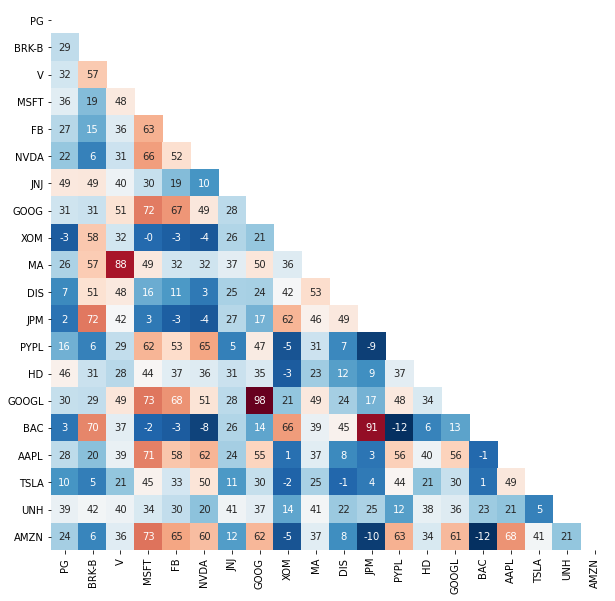

In [48]:
plt.figure(figsize=(10,10))
lower = np.zeros_like(rets.corr())
lower[np.triu_indices_from(lower)] = True 
sns.heatmap(top_20.pct_change().corr()*100,cmap='RdBu_r',annot=True,mask = lower ,fmt='.0f',cbar=False)
plt.show()

In [49]:
top_5 = rets.drop(list(correlation(rets,0.456)),axis = 1)

In [50]:
top_5.corr()*100

,PG,BRK-B,MSFT,TSLA,UNH
PG,100.000000,28.941279,36.498336,10.256594,38.626000
BRK-B,28.941279,100.000000,18.957874,4.657250,41.566113
MSFT,36.498336,18.957874,100.000000,45.321703,33.891717
TSLA,10.256594,4.657250,45.321703,100.000000,5.438138
UNH,38.626000,41.566113,33.891717,5.438138,100.000000


In [51]:
top_5

,PG,BRK-B,MSFT,TSLA,UNH
Date,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.019042,0.004918,-0.015009,0.001347,0.002931
2020-08-05,-0.002616,0.016880,-0.001641,-0.001332,0.026174
2020-08-06,-0.005471,0.006876,0.016014,0.003071,0.005088
2020-08-07,0.006330,0.021754,-0.017888,-0.024752,0.009457
...,...,...,...,...,...
2021-07-26,0.003505,0.001113,-0.002140,0.022133,-0.009959
2021-07-27,0.004063,0.007102,-0.008684,-0.019525,0.003772
2021-07-28,-0.014839,-0.009545,-0.001117,0.003412,-0.014286


### Annualized retruns and volatility

In [52]:
def get_annualized_return(df):
    number_of_days = df.shape[0]
    compound_returns = ((1+df).prod())-1
    return_rate_per_day = (1+compound_returns)**(1/number_of_days) - 1
    annualized_return  = (1+return_rate_per_day)**(252) - 1
    return annualized_return

In [53]:
get_annualized_return(top_5)

PG       0.110322
BRK-B    0.398478
MSFT     0.329982
TSLA     1.321551
UNH      0.379880
dtype: float64

In [54]:
def get_annualized_vol(df):
    annualized_vol = df.std()*((252)**0.5)
    return annualized_vol

In [55]:
get_annualized_vol(top_5)

PG       0.151321
BRK-B    0.178192
MSFT     0.250527
TSLA     0.676493
UNH      0.223808
dtype: float64

### Expected return and volatility of portfolio

In [56]:
def portfolio_return(weights,returns):
    return (weights.T @ returns)


In [57]:
def portfolio_vol(weights,covmat):
    return (weights.T @ covmat @ weights)**0.5 

### Efficent frontier  and  sharpe ratio 

<b>Return for portfolio would be between the asset with minimum return and the asset with maximum return . All<br>weights are between 0 and 1 and sum up to 1 . Starting at the minimum level of return the Quadratic  optimizer finds<br> the weights which give minimum volatility for a given value of target return</b> 

In [58]:
from scipy.optimize import minimize 


def vol_minimizer(er,cov,target_return, short_selling = False):
    # number of assets 
    n_assets = er.shape[0] 
    
    # starting point for optimisation 
    initial_guess = np.repeat(1/n_assets,n_assets)
    
    # Weights between 0 and 1 
    bounds = ((0.0,1.0),)*n_assets 
    
    # weights sum up to 1
    cons_1 = {'type':'eq','fun': lambda weights : np.sum(weights) - 1 }
    
    # expected return for portfolio = target return 
    cons_2 = {'type':'eq','fun': lambda weights , er : portfolio_return(weights,er) - target_return ,
             'args':(er,)}
    
    if (not(short_selling)):
        optimal_weights = minimize(portfolio_vol,initial_guess ,bounds = bounds ,
                               constraints = (cons_1,cons_2),
                               args=(cov,),
                               method = 'SLSQP' , 
                               options ={'disp':False})
    else:
        optimal_weights = minimize(portfolio_vol,initial_guess ,
                               constraints = (cons_1,cons_2),
                               args=(cov,),
                               method = 'SLSQP' , 
                               options ={'disp':False})
    
    return optimal_weights.x
    

In [59]:
def plot_efficient_frontier(er,cov,n_points,short_selling=False):
    # target return array 
    target_returns = np.linspace(er.min(),er.max(),n_points)
    
    # array of weights for each target return from optimizer 
    weights = [ vol_minimizer(er,cov,item,short_selling) for item in target_returns ]
    
    # x-axis and y-axis arrays for plotting efficient frontier 
    returns = [portfolio_return(item,er) for item in weights]
    vol = [portfolio_vol(item,cov) for item in weights]
    # line plot 
    ef = pd.DataFrame({'Expected_return':returns,'Volatility':vol})
    ef.plot.line(x= 'Volatility' , y = 'Expected_return' , style ='.-')
    

### Efficient frontier

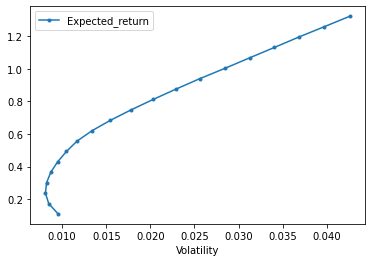

In [60]:
# expected returns of top 5 assets 
top_5_returns =  get_annualized_return(top_5)

# covariance matrix of top 5 
top_5_cov  =  top_5.cov()

plot_efficient_frontier(top_5_returns,top_5_cov,20) 

### Sharpe Ratio 
<b> Minimum of the negative sharpe ratio is calculated with the help of minimizer to get max sharpe ratio <br>
    There is no constraint on the expected return , the  optimizer find weights which give the <br>
    maximum sharpe ratio for weights between 0 and 1 and sum = 1 <b>

In [61]:
def max_sharpe(risk_free_rate,er,cov,short_selling = False):
    
    # number of assets 
    n_assets = er.shape[0]
    
    # initial guess 
    initial_guess = np.repeat(1/n_assets,n_assets)
    
    # function to get sharpe ratio of portfolio
    def neg_sharpe_ratio(weights,er,cov,risk_free_rate):
        exp_ret = portfolio_return(weights,er)
        vol = portfolio_vol(weights,cov)
        return (risk_free_rate - exp_ret)/vol
    
    # bounds for weights   and weights = 1 constraint 
    bounds = ((0.0,1.0),)*n_assets 
    cons_1 = {'type':'eq','fun':lambda weights : np.sum(weights) - 1}
    
    if ( not(short_selling)):
        optimal_w = minimize(neg_sharpe_ratio , initial_guess , bounds = bounds ,
                        constraints = cons_1 , args = (er,cov,risk_free_rate,),
                         method = 'SLSQP' , options = {'disp':False})
    else:
        optimal_w = minimize(neg_sharpe_ratio , initial_guess ,
                        constraints = cons_1 , args = (er,cov,risk_free_rate,),
                         method = 'SLSQP' , options = {'disp':False})
    return optimal_w.x
                         
    

In [62]:
def get_max_sharpe(risk_free_rate ,er,cov, disp_weights = False,short_selling=False):
    
    # optimal weights with maximum sharpe ratio 
    opt_w = max_sharpe(risk_free_rate,er,cov,short_selling)
    
    # portfolio return with max sharpe ratio
    exp_ret = portfolio_return(opt_w,er)
    
    # portfolo volatility with max sharpe ratio 
    vol = portfolio_vol(opt_w,cov)
    
    #plotting of capital market line (CML)
    plt.xlim(left = 0)
    cml_x = [0,vol]
    cml_y = [risk_free_rate,exp_ret]
    plt.plot(cml_x,cml_y,color='green',marker='o',linestyle='dashed')
    
    # returns , volatiltiy and sharpe ratio rounded to 5 decimal places 
    ratio = round((exp_ret-risk_free_rate)/vol,3)
    print("return :  {}".format(round(exp_ret,5)))
    print("volatility: {}".format(round(vol,5)))
    print("maximum sharpe ratio = {}".format(ratio))
    
    # displaying weights is set True 
    if disp_weights:
        w_df = pd.DataFrame({"Weights":[round(item,5)for item in opt_w]},index = er.index)
        print("{}\n".format(w_df))
        
    # function to plot the effcient frontier and capital market line together on one plot
def plot_ef_sharpe(er,cov,n_points,risk_free_rate,disp_weights=False,short_selling = False):
    plot_efficient_frontier(er,cov,n_points,short_selling) 
    get_max_sharpe(risk_free_rate,er, cov ,disp_weights,short_selling)

## Efficient frontier with sharpe ratio plots  and weights for  different combination of assets 

In [63]:
#  This function drops all assets which have correlation of more than p 
# and gives the effficent frontier and sharpe ratio for these assets 

def pf_returns(p):
    ret_new = rets.drop(list(correlation(rets,p)),axis = 1)
    return (get_annualized_return(ret_new))
    
def pf_cov(p):
    ret_new = rets.drop(list(correlation(rets,p)),axis = 1)
    return ret_new.cov()

#### 5 assets with the highest returns 

In [64]:
get_annualized_return(rets).sort_values(ascending = False)

TSLA     1.321551
GOOG     0.838627
GOOGL    0.821569
NVDA     0.777107
JPM      0.627437
BAC      0.572468
DIS      0.515347
XOM      0.470505
FB       0.416067
PYPL     0.400001
BRK-B    0.398478
UNH      0.379880
AAPL     0.349559
MSFT     0.329982
V        0.301257
HD       0.261772
MA       0.241652
JNJ      0.200292
PG       0.110322
AMZN     0.069600
dtype: float64

return :  0.80979
volatility: 0.01363
maximum sharpe ratio = 55.728
       Weights
TSLA   0.09897
GOOG   0.53029
GOOGL  0.00000
NVDA   0.01109
JPM    0.35965



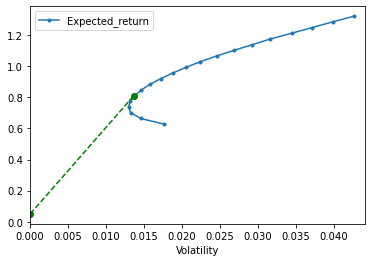

In [65]:
high_ret = ['TSLA','GOOG','GOOGL','NVDA','JPM']
ret = get_annualized_return(rets[high_ret])
covmat = rets.cov().loc[high_ret,high_ret]
plot_ef_sharpe(ret,covmat,20,0.05,disp_weights = True)

#### 5 least correlated

return :  0.55871
volatility: 0.01173
maximum sharpe ratio = 43.369
       Weights
PG     0.00000
BRK-B  0.60138
MSFT   0.00000
TSLA   0.17803
UNH    0.22059



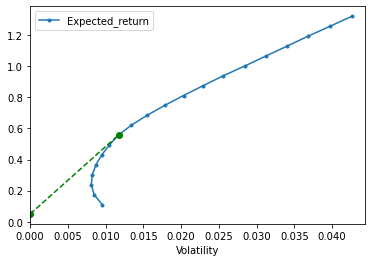

In [66]:
plot_ef_sharpe(pf_returns(0.456),pf_cov(0.456),20,0.05 , disp_weights = True)

####  All assets in one portfolio

return :  0.79012
volatility: 0.01327
maximum sharpe ratio = 55.795
       Weights
PG     0.00000
BRK-B  0.00000
V      0.00000
MSFT   0.00000
FB     0.00000
NVDA   0.00846
JNJ    0.00000
GOOG   0.49989
XOM    0.00000
MA     0.00000
DIS    0.02040
JPM    0.33176
PYPL   0.00000
HD     0.00000
GOOGL  0.00000
BAC    0.00000
AAPL   0.00000
TSLA   0.09841
UNH    0.04109
AMZN   0.00000



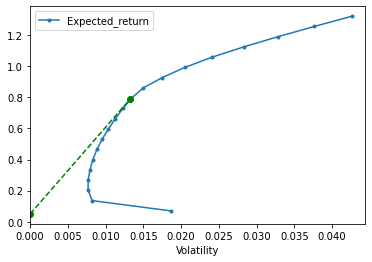

In [67]:
plot_ef_sharpe(pf_returns(1),pf_cov(1),20,0.05 , disp_weights = True)

#### assets having significant weights in previous portoflio

return :  0.79139
volatility: 0.01329
maximum sharpe ratio = 55.79
      Weights
TSLA  0.10072
JPM   0.33059
DIS   0.02039
UNH   0.04244
GOOG  0.50586



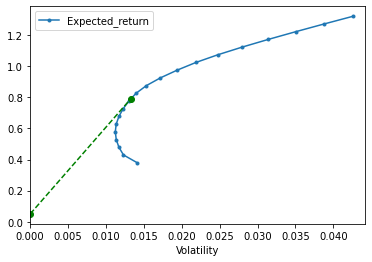

In [68]:
li = ['TSLA','JPM','DIS','UNH','GOOG']
ret_mod = rets[li]
cov_mod = rets.cov().loc[li,li]
plot_ef_sharpe(get_annualized_return(ret_mod),cov_mod,20,0.05 , disp_weights = True)

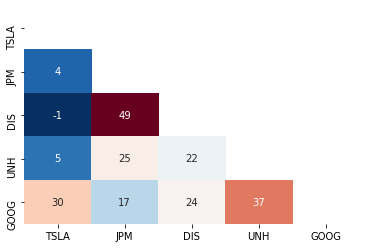

In [69]:
mat = np.zeros_like(rets.corr().loc[li,li])
mat[np.triu_indices_from(mat)]=True
sns.heatmap( rets.corr().loc[li,li]*100,fmt='.0f',annot= True ,cmap='RdBu_r',mask =mat,cbar=False)
plt.show()

### Portfolio with Short selling 

<b> the bounds on the weights are removed in both the efficent frontier optimizer and max sharpe optimizer <br>
    by setting short_selling = True in the plot_ef_sharpe function

#### 5 least correlated 

return :  0.7058
volatility: 0.01479
maximum sharpe ratio = 44.351
       Weights
PG    -0.32718
BRK-B  0.78752
MSFT  -0.05479
TSLA   0.23399
UNH    0.36046



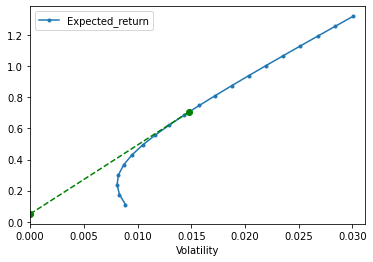

In [70]:
plot_ef_sharpe(pf_returns(0.456),pf_cov(0.456),20,0.05 , disp_weights = True , short_selling = True)

####  All assets in one portfolio

return :  1.97395
volatility: 0.02407
maximum sharpe ratio = 79.945
       Weights
PG    -0.28350
BRK-B  0.61816
V      0.45270
MSFT  -0.47296
FB    -0.25671
NVDA   0.32397
JNJ   -0.01291
GOOG   1.86349
XOM   -0.21782
MA    -1.05062
DIS    0.28622
JPM    0.59796
PYPL   0.04630
HD    -0.07565
GOOGL -0.32669
BAC   -0.30481
AAPL  -0.07701
TSLA   0.23923
UNH    0.27842
AMZN  -0.62778



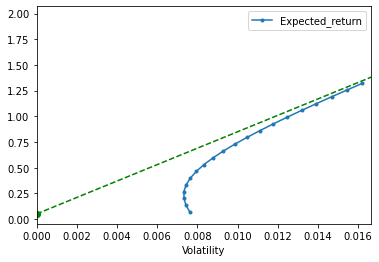

In [71]:
plot_ef_sharpe(pf_returns(1),pf_cov(1),20,0.05 , disp_weights = True,short_selling = True)